# Traitements élémentaires

In [1]:
import matplotlib.pyplot as plt
from string import punctuation
from wordcloud import WordCloud
from glob import glob

%matplotlib inline

## 1. Création d'un index de mots
À partir du fichier «discours_candidat.txt», on souhaite créer un index des mots présents dans ce document, avec pour chaque mot son nombre d’occurrences dans le texte.
### 1.  Découpage en mots
Écrire un programme Python qui lit les données du fichier et procède au découpage du texte en mots.

In [2]:
with open("data/discours_candidat.txt", encoding = "utf-8") as f:
    file = (
        f.read().lower()
        .translate(str.maketrans('', '', punctuation))
        .split()
    )

### 2. Calcul de distribution des mots du texte
Compléter le programme précédent pour calculer la distribution des mots : il s'agit de compter le nombred'occurrences (i.e. la fréquence) de chacun des mots utilisés.

In [3]:
count = {w:file.count(w) for w in set(file)} # lent car set crée un autre objet

### 3. Affichage
Écrire dans un nouveau fichier texte nommé «index_candidat.txt» les mots (et leur nombre d'occurrences) classés dans l'ordre décroissant de leur fréquence d'apparition. Pour des raisons de lisibilité, afficher un mot par ligne (la fréquence d'apparition du mot apparaîtra à droite du mot séparée par le symbole «:» (deux-points)).

In [4]:
with open("data/index_candidat.txt", "w", encoding="utf-8") as f:
    text = map(lambda x: f'{x[0]}:{x[1]}',
            sorted(count.items(), key=lambda x: x[1], reverse=True))
    print(*text, sep="\n", file=f)

## 2. Visualisation de données
Il s'agit à présent de  visualiser les données indexées (i.e. les mots filtrés associés à leur fréquence d'apparition).
### Nuage de mots

In [5]:
# APPENDIX pour mask
try:
    import numpy as np
    import requests
    from io import BytesIO
    from PIL import Image
except ImportError:
    macron = None
else:
    response = requests.get("https://image.noelshack.com/fichiers/2017/12/1490096202-stickermacron.png")
    macron = np.array(Image.open(BytesIO(response.content)))

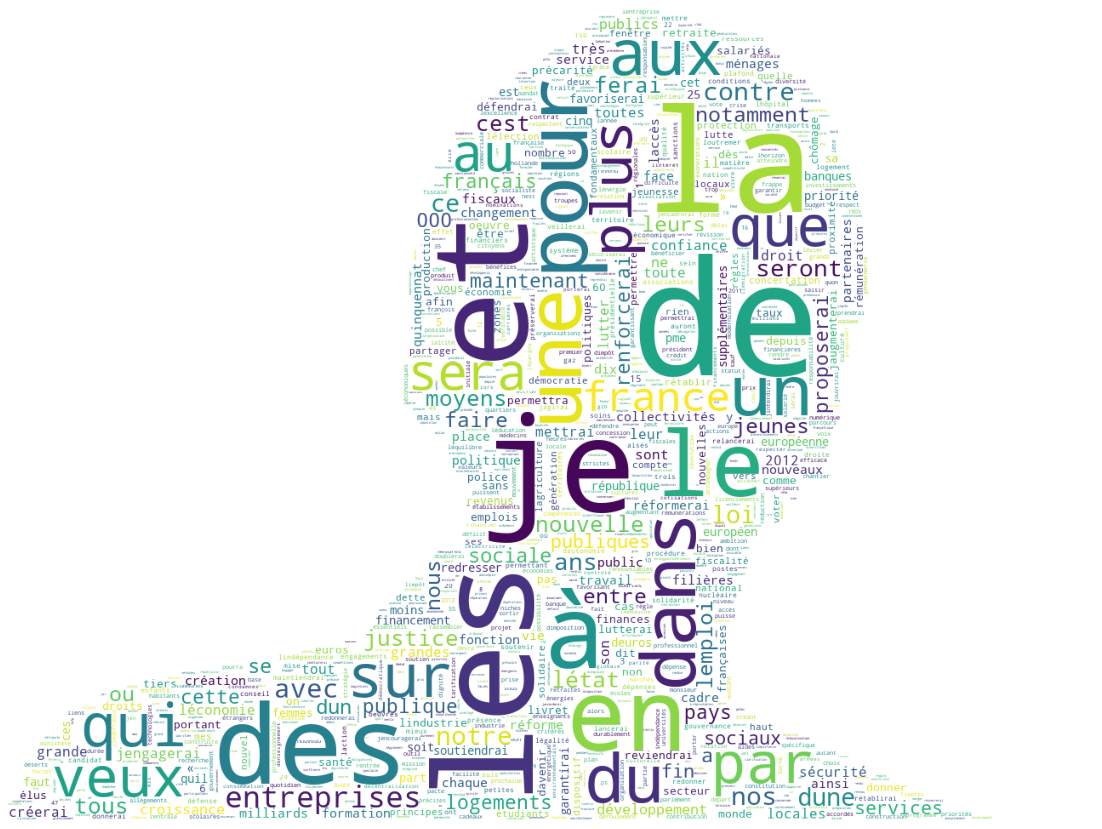

In [6]:
wc = WordCloud(background_color = "rgba(255, 255, 255, 0)", mode = "RGBA", max_words = 1000, mask = macron)
wc.generate_from_frequencies(count)
plt.rcParams["figure.figsize"] = (20, 15)
plt.imshow(wc)
plt.axis("off")
plt.show()

## 3. Indexation d'une collection de textes
Il s'agit à présent d'indexer non plus un document mais une collection entière de textes. La collection fournie (disponible à partir de l'archive nommée «discours_presidentiel.zip») correspond à une partie des discours duprésident français. Ces textes ont été recueillis à partir du site de l'Elysée.

Construire l'index des mots de la collection, associés à leur fréquence d'apparition (dans l'ensemble de la collection) et classés par ordre décroissant de leur fréquence.

In [7]:
def tokenizer(path):
    with open(path, encoding = "utf-8") as f:
        return (
            f.read().lower()
            .translate(str.maketrans('', '', punctuation))
            .split()
        )

In [8]:
words = sum(map(tokenizer, glob("data/discours_presidentiel/*.txt")), [])

In [9]:
count = dict()
for w in words:
    count[w] = count.get(w, 0) + 1 # plus rapide que set
count = dict(sorted(count.items(), key = lambda x:x[1], reverse = True))

Proposer un nuage de mots permettant de visualiser le contenu textuel de cette collection de textes.

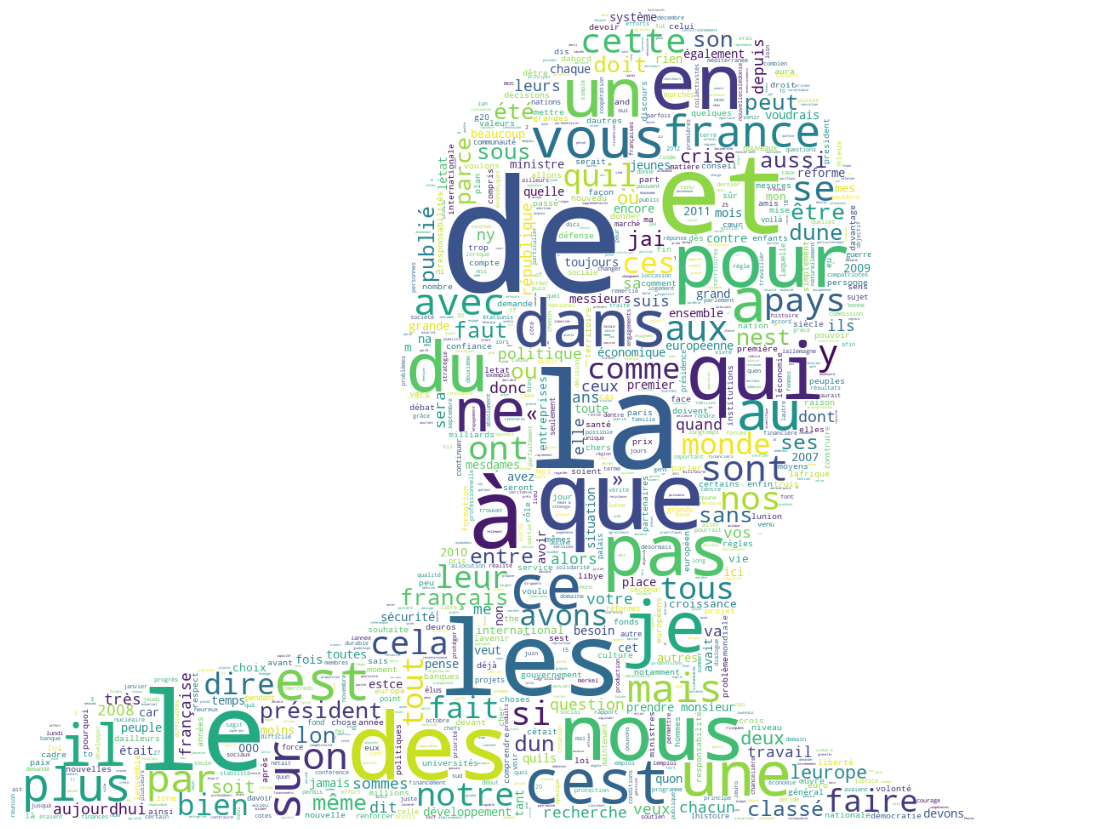

In [10]:
wc.generate_from_frequencies(count)
plt.imshow(wc)
plt.axis("off")
plt.show()